# Albert Szulc, 141321

# Zadanie domowe - analiza eksploracyjna + test statystyczny

In [1]:
Dane <- read.csv("insurance.csv") # https://www.kaggle.com/mirichoi0218/insurance
Dane
length(Dane$age)

age,sex,bmi,children,smoker,region,charges
19,female,27.900,0,yes,southwest,16884.924
18,male,33.770,1,no,southeast,1725.552
28,male,33.000,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.471
32,male,28.880,0,no,northwest,3866.855
31,female,25.740,0,no,southeast,3756.622
46,female,33.440,1,no,southeast,8240.590
37,female,27.740,3,no,northwest,7281.506
37,male,29.830,2,no,northeast,6406.411
60,female,25.840,0,no,northwest,28923.137


[1] 1338

# 1. Opis danych

Dane składają się z losowo wybranej próby 1338 osób mających wykupione ubezpieczenie zdrowotne w USA. Dane te pokazują zależność różnych cech pacjenta jak wiek, płeć, BMI, ilość dzieci, czy osoba jest paląca, z jakiego regionu USA pochodzi (możliwe 4 wartości) do kosztu ubezpieczenia zdrowowtnego.

# 2. Analiza eksploracyjna (ceny ubezpieczeń)

In [2]:
attach(Dane)
# detach(Dane)

### Liczność próby

In [3]:
n <- length(charges)
n

[1] 1338

### Średnia

In [4]:
avg <- mean(charges)
avg

[1] 13270.42

### Mediana

In [5]:
med <- median(charges)
med

[1] 9382.033

### Wartość minimalna

In [6]:
mn <- min(charges)
mn

[1] 1121.874

### Wartość maksymalna

In [7]:
mx <- max(charges)
mx

[1] 63770.43

### Wariancja

In [8]:
vr <- var(charges)
vr

[1] 146652372

### Odchylenie standardowe

In [9]:
std <- sd(charges)
std

[1] 12110.01

### Skośność

In [106]:
skew <- sum((charges - avg)^3)/(n * std^3)
skew

[1] 1.512483

### Kurtoza

In [11]:
kurt <- sum((charges - avg)^4)/(n * vr^2)
kurt

[1] 4.588954

## Szerg rozdzielczy

In [12]:
IQR(charges)
# quan <- quantile(charges, 3/4)
# quantile(charges, 3/4) - quantile(charges, 1/4)

[1] 11899.63

In [13]:
num_of_breaks <- round(sqrt(n))
szereg_roz <- cut(charges, breaks = sqrt(length(charges)))
paste(szereg_roz

ERROR: Error in parse(text = x, srcfile = src): <text>:4:0: unexpected end of input
2: szereg_roz <- cut(charges, breaks = sqrt(length(charges)))
3: paste(szereg_roz
  ^


## Histogram

In [214]:
create_hist <- function (dane, k=1) {
    len_of_breaks <- 2.64 * IQR(dane) * n^(-1/3) * k
    num_of_breaks <- round((max(dane) - min(dane))/len_of_breaks)
    hist(dane, col='#4ea4cc',breaks=num_of_breaks, main = paste("Charges, asked breaks:",num_of_breaks))
}

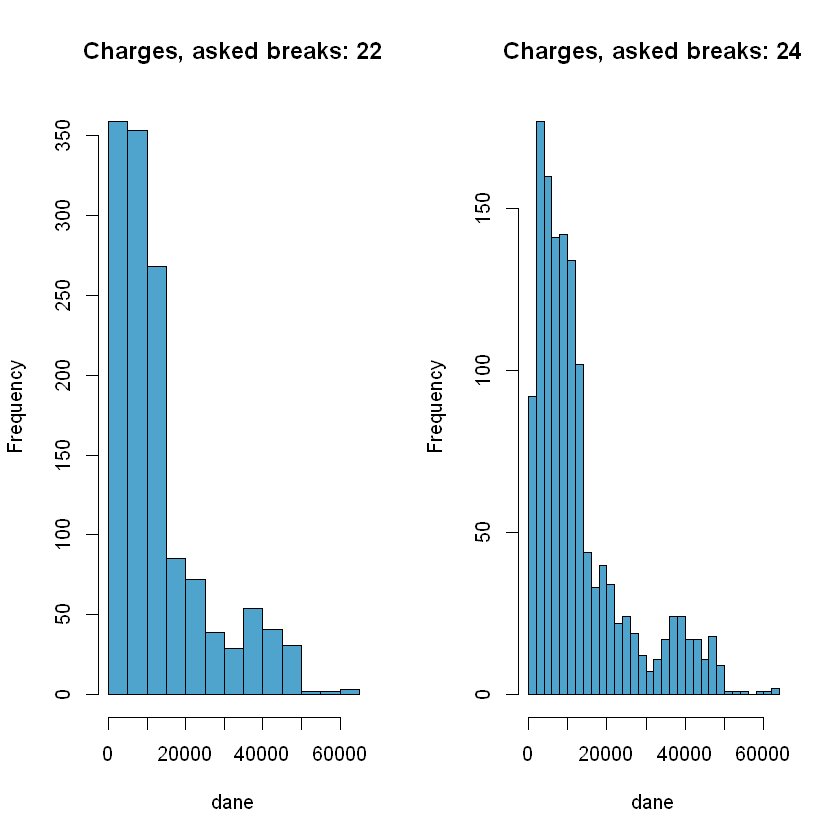

In [215]:
prev <- par(mfrow=c(1,2))
create_hist(charges, 1)
create_hist(charges, 0.9)
par(prev)

Do obliczenia długości przedziałów zastosowałem wzór $h = 2.64 * IQR * n^{-1/3}$. Na podstawie długości tych przedziałów został zbudowany histogram. Wydał mi się on jednak dosyć ogólny, dlatego zmniejszając długość przedziałów do 90% z h udało mi się uzyskać bardziej szczegółowy histogram. <br> Histogram po lewo jest bardziej ogólny, jednak i tak dobrze odzwierciedla główne mody lokalne na 2/3 oraz 36/37 tysiącach dolarów. Na prawym histogrami natomiast możemy bardziej szczegółowo przyjrzeć się danym i można dostrzec dodatkowe mody np. na 20 tys, oraz znaczny spadek liczby osób płacącynajniższe składki poniżej 2 tys dolarów. Uważam, że oba te wykresy znajdą swoje zastosowania.

## Koszt ubezpieczenia, w zależności od BMI

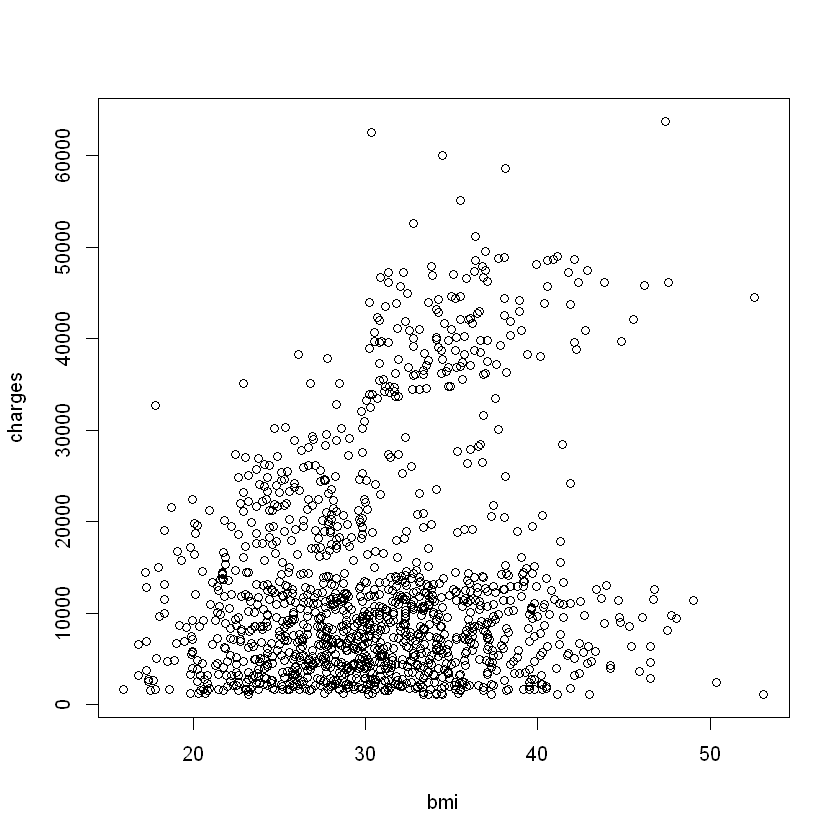

In [16]:
plot(charges ~ bmi)

Z wykresu można dostrzec pewną zależność, że osoby które mają BMI<30 płacą mniej niż osoby mające ten wskaźnik niższy. Należy jednak sprawdzić wskaźniki korelacji i regresji by wykazać zależność. 

### Wpółczynnik korelacji

In [17]:
cor.test(charges,bmi)


	Pearson's product-moment correlation

data:  charges and bmi
t = 7.3966, df = 1336, p-value = 2.459e-13
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1463052 0.2492822
sample estimates:
     cor 
0.198341 


P-value dla testu t dla współczynnika korelacjila każdego sensowengo poziomu istotności(0.05,0.01,0.001...) odrzuciłby hipotezę zerową, zakładającą brak zależności między zmiennymi.

In [18]:
cor(charges, bmi)

[1] 0.198341

Współczynnik korelacji przyjmuje zbyt małą wartość, by można jasno wskazać, że taka zależność ma znaczącą wartość. Tym bardzij budowanie modelu regresji nie ma sensu.

# Koszt ubezpieczenia w zależności od faktu palenia papierów

[1] "Smoker: median =  34456.34845 , standard deviation =  11541.5471755891"

[1] "No smoker: median =  7345.4053 , standard deviation =  5993.78181919493"

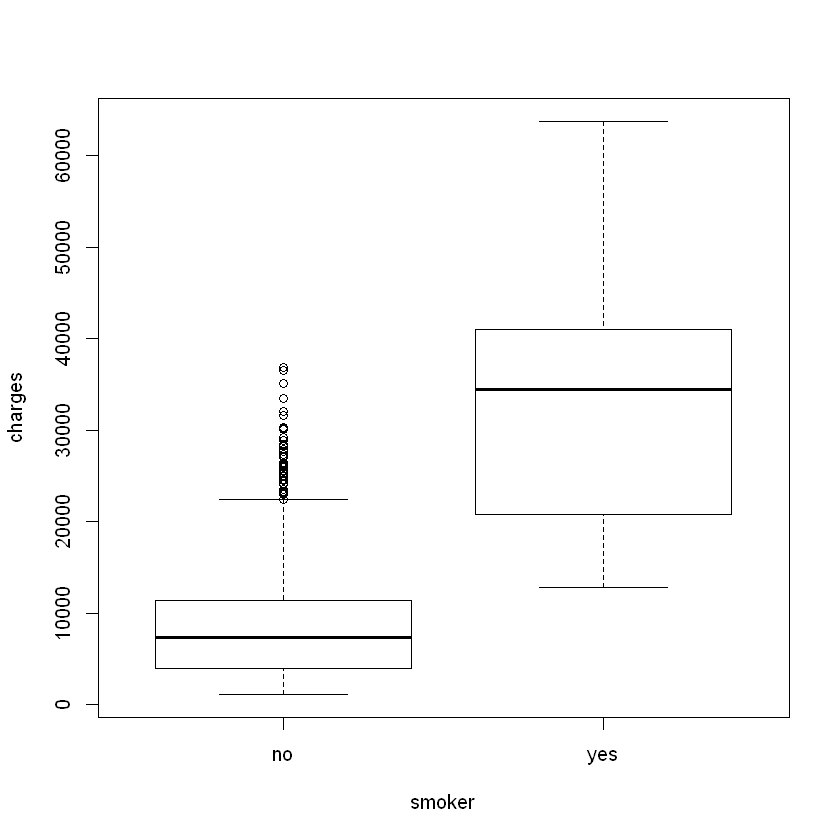

In [19]:
plot(charges ~ smoker)
name <- c('Smoker', 'No smoker')
med <- c(median(charges[smoker == 'yes']), median(charges[smoker == 'no']))
paste('Smoker: median = ', median(charges[smoker == 'yes']), ', standard deviation = ', sd(charges[smoker == 'yes']))
paste('No smoker: median = ', median(charges[smoker == 'no']), ', standard deviation = ', sd(charges[smoker == 'no']))

Tutaj zdecydownie można dostrzec trend, że ludzie palący płacą za ubezpieczenie zdrowotne znacznie więcej.

# 3. Testy

## Średnia koszt ubezpieczenia (test dla jednej populacji)

Wykonajmy test dla średniej wartości opłaty w populacji. Jako, że próba jest duża (>1000) to żeby móc sprawidzić więcej rzeczy i uczynić testy ciekawszymi uznajmy, że nasza próba jest populacją z której będziemy wybierać losowo próby.

### Centralne Twierdzenie Graniczne

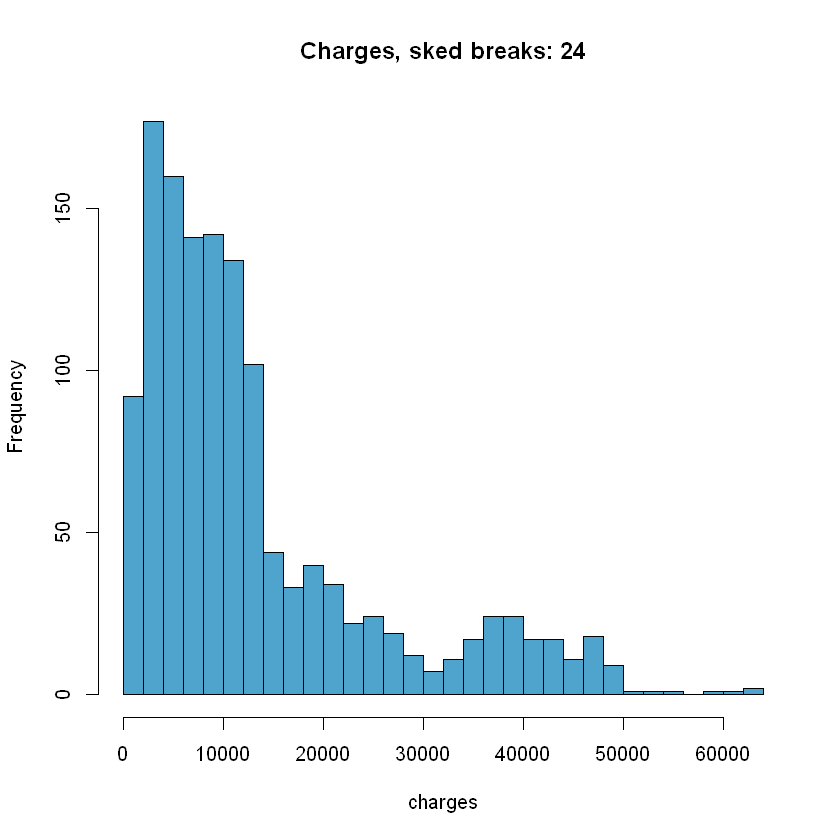

In [103]:
create_hist(charges, k=0.9)

Z histogramu, który pozwoliłem sobie pokazać jescze raz, wyraźnie widać, że rozkład "populacji" jest mocno dodatnie skośny. Sprawdźmy dla jakiej próby można uznać, że mamy do czynienia z rozkładem normalnym dla wartości średniej.

In [250]:
clt_plot <- function(samp_size, data, k=25) {
    my_mean <- c()
    for (var in 1:2000)
        {
        my_sample <- data[sample.int(n,samp_size, replace = TRUE)]
        my_mean <- c(mean(my_sample),my_mean)
    }
    hist(my_mean, col='#4ea4cc',breaks=k, main = paste("Rozmiar próbki: ",samp_size), xlab = "Koszt ubezpieczenia", ylab = "Częstość występowania")
}

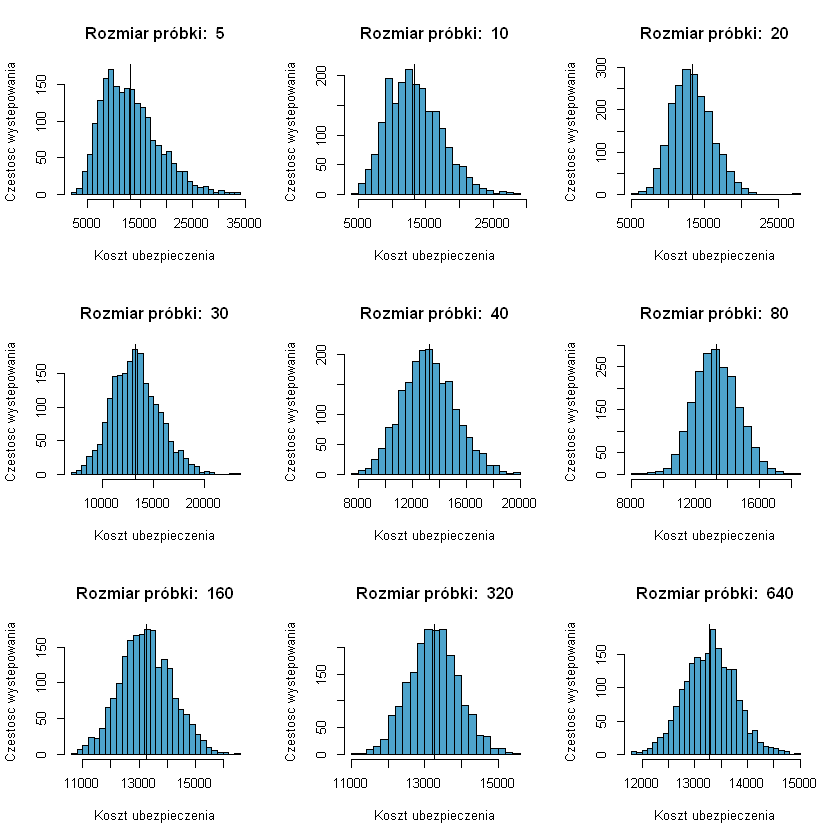

In [251]:
sample_size <- c(5,10,20,30,40,80,160,320,640)
prev <- par(mfrow=c(3,3))
num_of_breaks <- 25
for (i in 1:9){
    clt_plot(sample_size[i], charges, num_of_breaks)
    abline(v=mean(charges))
}
par(prev)

## Czy osoby z wyższym BMI płacą więcej? (test dla dwóch populacji)

Przetestujmy czy rzeczywiście osoby palące płacą więcej niż nie palące

## Czy mężczyźni palą częściej niż kobiety (test dla dwóch populacji)

Uważa się, że mężczyźni średnio częściej są palaczami niż kobiety. Sprawdźmy to używając testu Z. <br> Przeprowadźmy test jednostronny: <br> H0: $\mu_{mężczyzn} = \mu_{kobiet}$, <br> H1: $\mu_{mężczyzn} > \mu_{kobiet}$ <br> $\alpha = 0.01$

### Liczba kobiet i mężczyzn próbie

In [72]:
n_female <- length(Dane[Dane$sex == 'female', ]$smoker)
n_male <- length(Dane[Dane$sex == 'male', ]$smoker)
paste('Liczba kobiet: ', n_female)
paste("Liczba mężczyzn: ", n_male)

[1] "Liczba kobiet:  662"

[1] "Liczba mezczyzn:  676"

Widzimy, że próba jest duża, dlatego dzięki znajomości CLT wiemy, że test Z będzie odpowiedni do przeprowadzenia tego testu

### Liczba kobiet i mężczyzn palących

In [36]:
smoker_female <- length(Dane[Dane$smoker == 'yes' & Dane$sex == 'female',]$smoker)
smoker_male <- length(Dane[Dane$smoker == 'yes' & Dane$sex == 'male',]$smoker)
paste('Liczba palących kobiet: ', smoker_female)
paste('Liczba palących kobiet: ', smoker_male)

[1] "Liczba palacych kobiet:  115"

[1] "Liczba palacych kobiet:  159"

### Prawdopodobieństwo że osoba danej płci pali

In [37]:
Ex_female <- smoker_female/female
Ex_male <- smoker_male/male
paste('Kobiety: ', Ex_female)
paste('Mężczyźni: ', Ex_male)

[1] "Kobiety:  0.173716012084592"

[1] "Mezczyzni:  0.235207100591716"

### Łączne odchylenie standardowe

In [48]:
VarF <- Ex_female*(1-Ex_female)/n_female
VarM <- Ex_male*(1-Ex_male)/n_male
Std <- sqrt(VarF + VarM)
paste('Wartość odchylenia: ',Std)

[1] "Wartosc odchylenia:  0.021975613250088"

### Wartość statystyki Z i p-value

In [65]:
Z <- (Ex_male - Ex_female)/Std
paste('Wartość statystyki Z: ', Z)
paste('P-value:' ,1 - pnorm(Z))

[1] "Wartosc statystyki Z:  2.79815119638937"

[1] "P-value: 0.00256980238081761"

### Wnioski

Otrzymana wartość p-value pozwala odrzucić H0. Test przeprowadzony na tej próbie wykazuje, że więcej mężczyzn pali papierosy niż kobiety.